In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4
rcParams['figure.dpi'] = 200

import torch

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

In [2]:
from scipy.spatial import distance_matrix

In [3]:
n1 = 50

In [4]:
V = 50000

In [5]:
d0 = 5

In [6]:
cutoff_list = list()
for l in range(d0):
    cutoff_list+= [np.sort([np.random.randint(0,high=n1*2),np.random.randint(n1,high=n1*3)])]

In [7]:
x0 = np.random.randint(0,high=d0,size=V)

In [8]:
dtype = torch.float

In [9]:
cutoff_list

[array([70, 85]),
 array([ 92, 123]),
 array([ 81, 126]),
 array([ 64, 146]),
 array([  4, 114])]

In [10]:
n = n1*3

In [11]:
W0_list = list()

In [12]:
for l in range(d0):

    W0 = np.zeros([n, 3])

    cutoffs = cutoff_list[l]
    W0[:cutoffs[0],0] =1
    W0[cutoffs[0]:cutoffs[1],1] =1
    W0[cutoffs[1]:,2] =1

    W0 = np.array([np.random.dirichlet(W0[i]+0.3,1)[0] for i in range(n)])
    
    W0_list.append(W0)

In [13]:
import copy

In [14]:
W0Oracle_list = copy.deepcopy(W0_list )

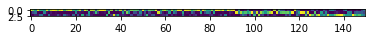

In [15]:
plt.imshow(W0_list[0].T)
plt.imshow(W0_list[1].T)

In [16]:
v =0 


c = np.argmax( np.random.gumbel(size=[n,3]) + np.log(W0_list[x0[v]]),1)


In [17]:
Y = np.random.normal(0,1,[n1*3,2])

In [18]:
S_list = list()

for v in range(V):
    
    Y = np.random.normal(0,1,[n1*3,2])
    

    c = np.argmax( np.random.gumbel(size=[n,3]) + np.log(W0_list[x0[v]]),1)

#     cutoffs = cutoff_list[x0[v]]
    
    Y[c==1,] -= 2
    Y[c==2,] += 2

    n = Y.shape[0]
    D = torch.zeros(n,n)

    D = distance_matrix(Y,Y,p=2)

    # use 30% quantile of each row as the bandwidth
    b = np.sqrt(np.quantile(D,0.3,  axis=0))

    S = np.exp(- (D/b).T/b)

    S_list.append(S)

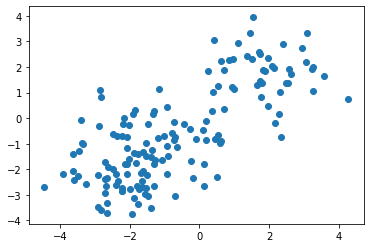

In [19]:
plt.scatter(Y[:,0],Y[:,1])

In [21]:
S_list[np.arange(V)[x0==0][0]]

array([[1.        , 0.19381754, 0.14139655, ..., 0.35358734, 0.16717355,
        0.26669852],
       [0.19381754, 1.        , 0.16718955, ..., 0.32565177, 0.13787909,
        0.41484624],
       [0.14139655, 0.16718955, 1.        , ..., 0.21796111, 0.5984096 ,
        0.19918495],
       ...,
       [0.35358734, 0.32565177, 0.21796111, ..., 1.        , 0.25249825,
        0.7055058 ],
       [0.16717355, 0.13787909, 0.5984096 , ..., 0.25249825, 1.        ,
        0.20800221],
       [0.26669852, 0.41484624, 0.19918495, ..., 0.7055058 , 0.20800221,
        1.        ]])

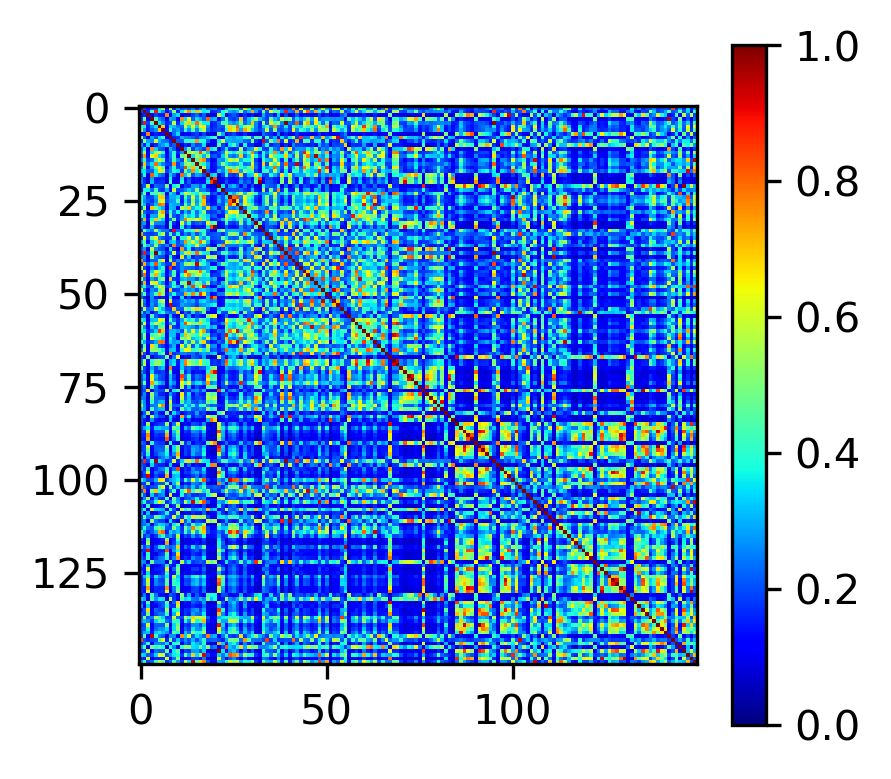

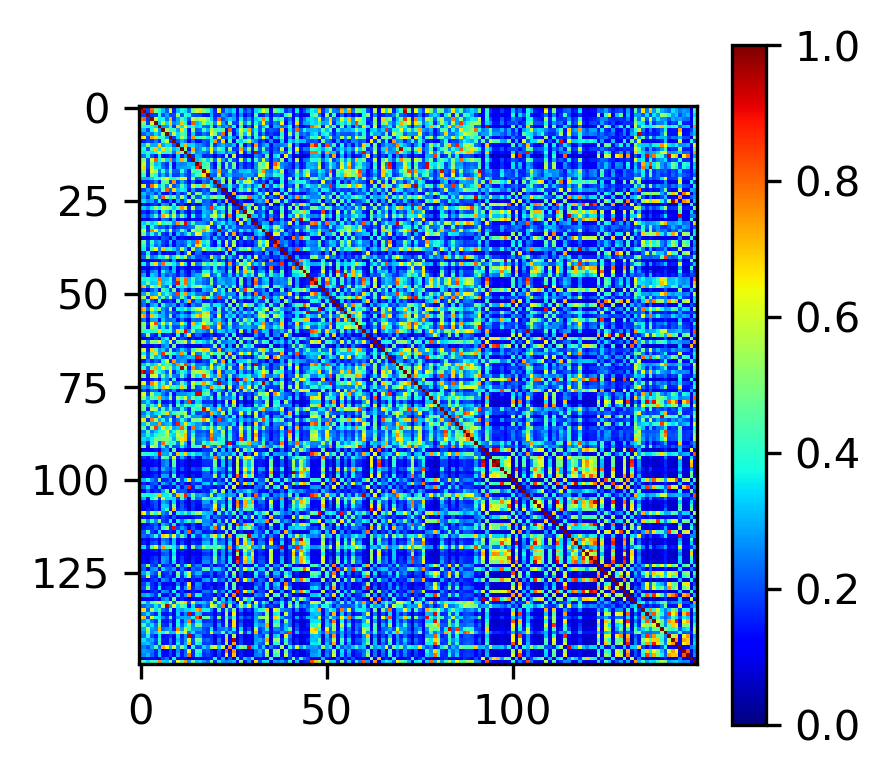

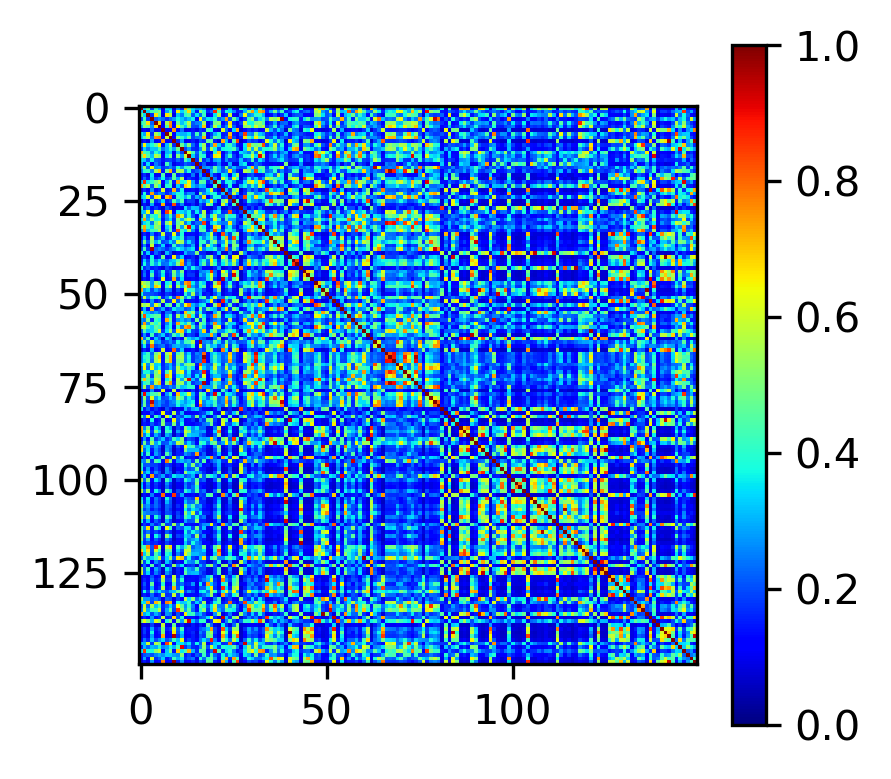

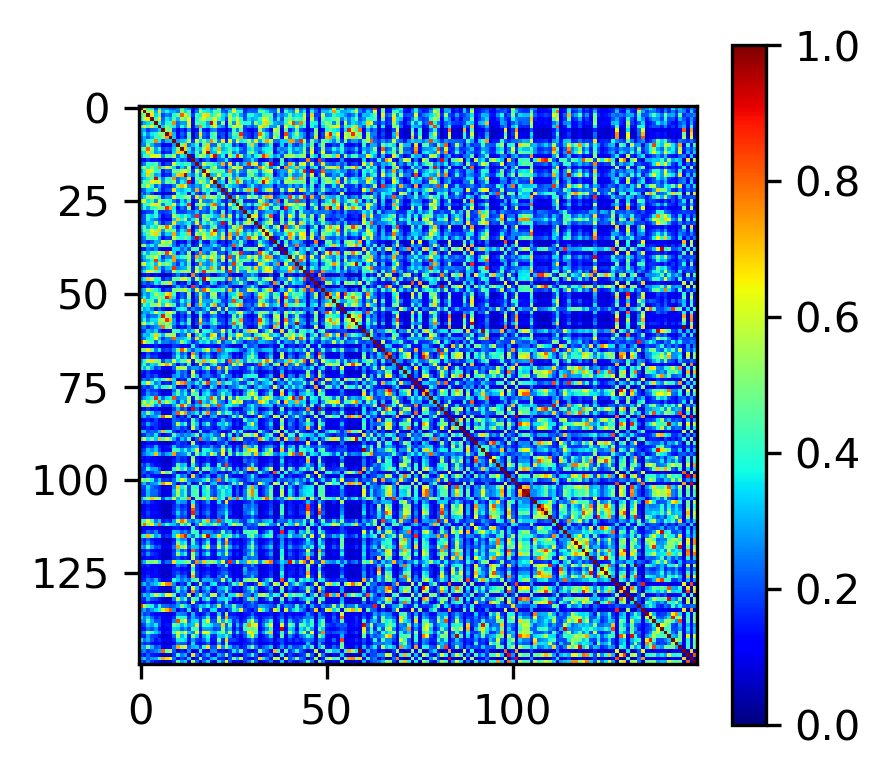

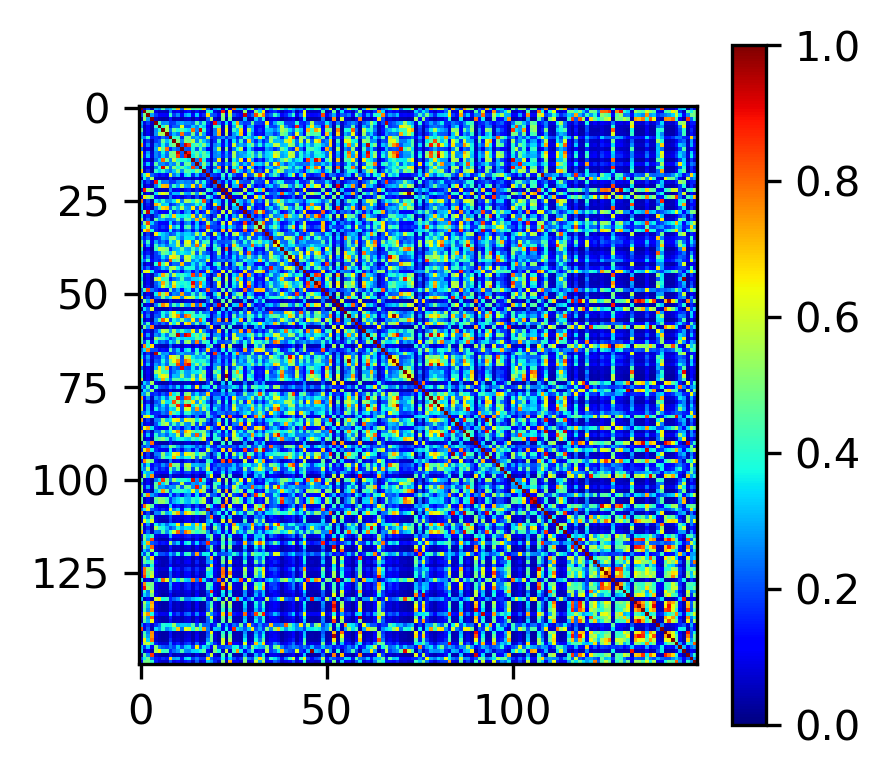

In [22]:
S = S_list[np.arange(V)[x0==0][0]]

fig = plt.figure(dpi=300,figsize=(3, 3))
plt.imshow(S, cmap="jet", vmin=0,vmax=1)
plt.colorbar()
fig.savefig('sim4_data1_S.png')

S = S_list[np.arange(V)[x0==1][0]]

fig = plt.figure(dpi=300,figsize=(3, 3))
plt.imshow(S, cmap="jet", vmin=0,vmax=1)
plt.colorbar()
fig.savefig('sim4_data2_S.png')

S = S_list[np.arange(V)[x0==2][0]]

fig = plt.figure(dpi=300,figsize=(3, 3))
plt.imshow(S, cmap="jet", vmin=0,vmax=1)
plt.colorbar()
fig.savefig('sim4_data3_S.png')

S = S_list[np.arange(V)[x0==3][0]]

fig = plt.figure(dpi=300,figsize=(3, 3))
plt.imshow(S, cmap="jet", vmin=0,vmax=1)
plt.colorbar()
fig.savefig('sim4_data4_S.png')

S = S_list[np.arange(V)[x0==4][0]]

fig = plt.figure(dpi=300,figsize=(3, 3))
plt.imshow(S, cmap="jet", vmin=0,vmax=1)
plt.colorbar()
fig.savefig('sim4_data5_S.png')

In [ ]:
# plt.plot(S[n1*2])

In [24]:
g = 10

In [25]:
d = 10

In [26]:
# initialize eta with K-means

ltri_idx = np.tril_indices(n,k=-1)

logs_mat = np.zeros([V, int(n*(n-1)/2)])
s_mat = np.zeros([V, int(n*(n-1)/2)])

for v in range(V):
    s_mat[v] = (S_list[v][ltri_idx])

logs_mat = np.log(s_mat)
    
from sklearn.cluster import KMeans

km_fit= KMeans(d).fit(logs_mat).labels_

from sklearn.preprocessing import OneHotEncoder

eta_ini = np.eye(d)[km_fit]

# smoothing
eta_ini = (eta_ini + 1/V) / (1+ d/V)

# eta_ini_dev = torch.tensor(eta_ini,device=device,dtype=dtype)

In [28]:
s_mat.shape

(50000, 11175)

In [29]:
import pickle as pkl

pkl.dump( Y, open( "multiview_sim_y.pkl", "wb" ) )
pkl.dump( s_mat, open( "multiview_sim_s_mat.pkl", "wb" ), protocol=4) 
pkl.dump( km_fit, open( "multiview_sim_init_x_v.pkl", "wb" ) )


In [30]:
pkl.dump( x0, open( "multiview_sim_x0.pkl", "wb" ) )

In [31]:
pkl.dump( W0_list, open( "multiview_sim_w0_list.pkl", "wb" ) )